# Fake News - EDA

In [7]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
# Read fake news csv
fake = pd.read_csv('../Data/fake-news/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Read true news csv
true = pd.read_csv('../Data/fake-news/True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Let us now add labels to the DataFrames, a `1` for true news and `0` for fake news.

In [5]:
# Add binary label column
fake['label'] = 0
true['label'] = 1

We now merge the two DataFrames.

In [6]:
# Merge using pd.concat
df = pd.concat([true, fake], ignore_index = True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


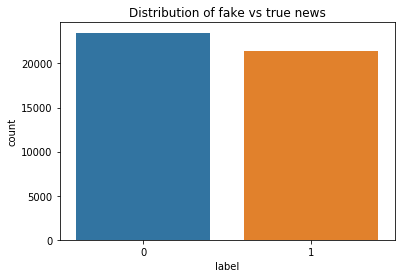

In [11]:
# Visualise class distribution
sns.countplot(df.label)
plt.title('Distribution of fake vs true news')
plt.show()

The dataset is balanced.

## Clean Data

### Investigate missing values

In [15]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
label      44898 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [14]:
# Check missing values
df.isna().any().any()

False

There does not appear to be any missing values.

### Investigate duplicates

In [17]:
titlecounts = df.title.value_counts()
titlecounts

Factbox: Trump fills top jobs for his administration                                                     14
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
Factbox: Contenders for senior jobs in Trump's administration                                             8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
                                                                                                         ..
UK's Corbyn wants much more information on EU divorce deal                                                1
Sanders back in U.S. Senate, blasts 'colonialism' in Puerto Rico                                          1
Iraqi forces remove Kurdish flag from Kirkuk governorate building: residents                              1
 Ben Carson Really Just Comp

In [18]:
# Get duplicate titles, ie more than once
len(titlecounts[titlecounts>1])

5629

There are 5629 entries with the same title.

In [21]:
# Investigate most popular title
toptitledf = df[df['title'] == 'Factbox: Trump fills top jobs for his administration']
toptitledf.head()

,title,text,subject,date,label
6220,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 19, 2017",1
6394,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 11, 2017",1
6615,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 21, 2016",1
6637,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 19, 2016",1
6655,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 17, 2016",1


In [26]:
len(df)

44898

We will drop duplicate rows.

In [28]:
df = df.drop_duplicates()
len(df)

44689

We will drop rows with same title and text (keeping the first instance.)

In [34]:
df = df.drop_duplicates(['title', 'text'])
len(df)

39105

We will also drop rows with exact same text (keeping the first instance.)

In [35]:
df = df.drop_duplicates(['text'])
len(df)

38646

### Investigate date